<div class="alert alert-block alert-info">
<h2 style="margin-top: 0">In this notebook, we will cover:</h2>

- An overview of astroquery
- Example use of several archives

This notebook builds on the previous tutorials for Astropy Units/Quantities, Coordinates, FITS, and Tables.
</div>

In [1]:
# Import useful Astropy functionality
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

## Downloading a Catalog from a Paper

In [2]:
from astroquery.vizier import Vizier
catalog_list = Vizier.find_catalogs('Dupuy Liu')

In [4]:
type(catalog_list)

collections.OrderedDict

In [5]:
[print(f'{k}:{v.description}') for k,v in catalog_list.items()]

J/ApJ/792/119:Companions to nearby stars from Pan-STARRS 1 (Deacon+, 2014)
J/ApJ/833/96:Hawaii infrared parallax program. II. Ultracool dwarfs (Liu+, 2016)
J/ApJS/201/19:Hawaii Infrared Parallax Program. I. (Dupuy+, 2012)
J/ApJS/231/15:Astrometric monitoring of ultracool dwarf binaries (Dupuy+, 2017)
J/AJ/159/257:Hawaii IR parallax program. IV. L0-T8 BDs with UKIRT (Best+, 2020)
J/AJ/160/38:Spitzer variability detections of 79 brown dwarfs (Vos+, 2020)
J/AJ/161/42:Volume-limited sample of cool dwarfs. I. L0-T8 dwarfs (Best+, 2021)
J/MNRAS/433/457:76 T dwarfs from the UKIDSS LAS (Burningham+, 2013)
J/MNRAS/468/3499:Partially resolved binaries in PS1 data (Deacon+, 2017)


[None, None, None, None, None, None, None, None, None]

In [6]:
result = Vizier.get_catalogs(catalog="J/ApJS/201/19")[0]

In [7]:
result

Name,SpTopt,SpTnir,RAJ2000,DEJ2000,plx,pm,pmPA,J2mag,H2mag,K2mag,__3.6_,__4.5_,Sys,SimbadName
,,,deg,deg,mas,mas / yr,deg,mag,mag,mag,mag,mag,,
str29,str7,str7,float64,float64,float32,float32,float64,float32,float32,float32,float32,float32,int16,str29
SDSS J000013.54+255418.6,,T4.5,0.05639,25.90546,70.80,128.10,351.43,15.063,14.731,14.836,13.720,13.070,141,SDSS J000013.54+255418.6
2MASSI J0003422-282241,M7.5,,0.92770,-28.37834,25.70,314.46,116.75,13.068,12.376,11.972,--,--,242,2MASSI J0003422-282241
GJ 1001B,,L5,1.14519,-40.73497,76.86,1627.00,156.70,13.813,12.735,12.100,--,--,637,GJ 1001 B
GJ 1001C,,L5,1.14519,-40.73497,76.86,1627.00,156.70,13.913,12.885,12.200,--,--,637,GJ 1001 B
LSR J0011+5908,M6.5,,2.88260,59.14446,108.30,1472.28,217.67,9.945,9.393,9.093,--,--,161,LSR J0011+5908
HD 1160B,,,3.98871,4.25113,9.66,25.48,123.90,15.830,14.650,14.120,--,--,301,HD 1160B
BRI 0021-0214,M9.5,M9.5,6.10265,-1.97226,86.60,155.20,328.80,11.992,11.084,10.539,9.940,9.910,214,BRI B0021-0214
LHS 1070A,M6,,6.18414,-27.14007,129.47,653.70,348.30,9.982,9.312,9.071,--,--,110,LHS 1070


In [8]:
result[0]

Name,SpTopt,SpTnir,RAJ2000,DEJ2000,plx,pm,pmPA,J2mag,H2mag,K2mag,__3.6_,__4.5_,Sys,SimbadName
,,,deg,deg,mas,mas / yr,deg,mag,mag,mag,mag,mag,,
str29,str7,str7,float64,float64,float32,float32,float64,float32,float32,float32,float32,float32,int16,str29
SDSS J000013.54+255418.6,,T4.5,0.05639,25.90546,70.80,128.10,351.43,15.063,14.731,14.836,13.720,13.070,141,SDSS J000013.54+255418.6


Exercise: Think about a paper in your field and get the data from it.

## Cone Search SDSS

Hint: most astroquery modules have a query_region() method when it makes sense to query for coordinate.

In [9]:
# First create a SkyCoord object
position = SkyCoord(result[0]['RAJ2000'], result[0]['DEJ2000'], unit="deg")

In [10]:
# Get closeby sources from SDSS
from astroquery.sdss import SDSS
sdss = SDSS()
closeby_sources = sdss.query_region(position, radius=0.1 * u.arcmin, timeout=3600)

In [11]:
closeby_sources

ra,dec,objid,run,rerun,camcol,field
float64,float64,uint64,int64,int64,int64,int64
0.0564280319092063,25.9052215532103,1237666246303810417,4836,301,6,366
0.056379041826176,25.9053529744275,1237678581439398890,7708,301,6,206


In [12]:
images = sdss.get_images(matches=closeby_sources, band =['u', 'g', 'r', 'i', 'z'])

In [13]:
np.shape(images)

(10, 4)

In [17]:
images[0][0].data

(1489, 2048)

In [18]:
for image in images:
    print(image[0].header['Filter'])

u
g
r
i
z
u
g
r
i
z


In [ ]:
images[0][0].header

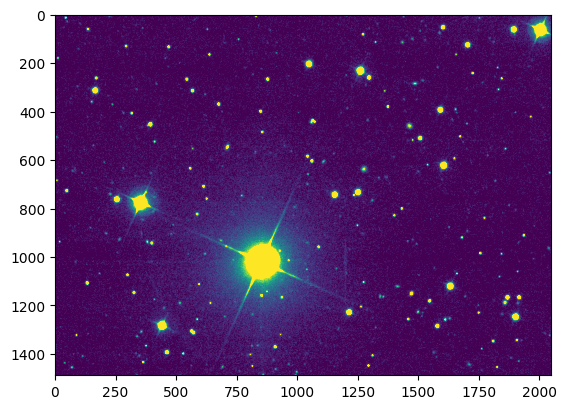

In [26]:
plt.imshow(images[6][0].data, vmin=0, vmax=0.1)

See how to make a RGB image: https://docs.astropy.org/en/stable/visualization/rgb.html

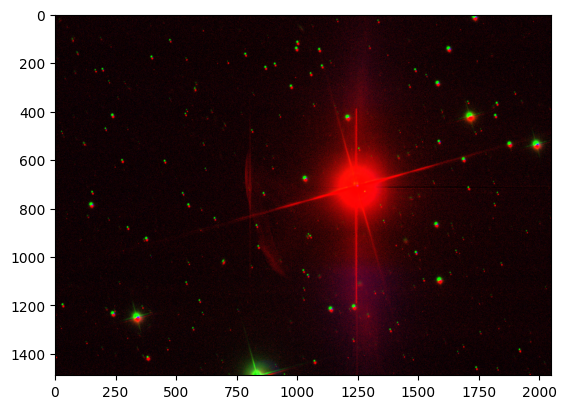

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
rng = np.random.default_rng()
image_r = images[4][0].data
image_g = images[2][0].data
image_b = images[0][0].data
image = make_lupton_rgb(image_r, image_g, image_b, stretch=1.0)
plt.imshow(image)

## Search MAST archive

In [32]:
from astroquery.mast import Observations
obs_table = Observations.query_object("M8",radius=".02 deg")
len(obs_table)

477

In [33]:
obs_table

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,distance
str11,str11,str31,str17,str3,str17,str16,str52,str32,str62,float64,float64,str10,str24,int64,float64,float64,float64,float64,float64,str131,float64,str24,str8,int64,str18464,str175,str176,str6,bool,float64,str9,float64
science,SPITZER_SHA,SSC Pipeline,IRAC,--,IRAC2,Infrared,M8,--,000000BF7400,270.920833,-24.377944,image,"Gehrz, Robert",2,nan,nan,nan,3990.0,5010.0,IRAC and MIPS Imaging and IRS Spectroscopy of Pre and Post Main Sequence Stellar Systems,54014.78356478,RDG-GTO_124,Spitzer,12547072,POLYGON ICRS -89.09678200 -24.39255200 -89.09684500 -24.38183600 -89.08484700 -24.38172400 -89.08480500 -24.39243700 -89.09678200 -24.39255200,--,https://irsa.ipac.caltech.edu/data/SPITZER/SHA/archive/proc/IRAC007000/r12547072/ch2/bcd/SPITZER_I2_12547072_0075_0000_5_bcd.fits,PUBLIC,False,nan,1647157,0.0
science,SPITZER_SHA,SSC Pipeline,IRAC,--,IRAC2,Infrared,M8,--,000000BF7400,270.920833,-24.377944,image,"Gehrz, Robert",2,nan,nan,nan,3990.0,5010.0,IRAC and MIPS Imaging and IRS Spectroscopy of Pre and Post Main Sequence Stellar Systems,54014.78356478,RDG-GTO_124,Spitzer,12547072,POLYGON ICRS -89.09603000 -24.39338800 -89.09609300 -24.38267200 -89.08409500 -24.38256000 -89.08405300 -24.39327300 -89.09603000 -24.39338800,--,https://irsa.ipac.caltech.edu/data/SPITZER/SHA/archive/proc/IRAC007000/r12547072/ch2/bcd/SPITZER_I2_12547072_0073_0000_5_bcd.fits,PUBLIC,False,nan,1647157,0.0
science,SPITZER_SHA,SSC Pipeline,IRAC,--,IRAC3,Infrared,M8,--,000000BF7400,270.920833,-24.377944,image,"Gehrz, Robert",2,nan,nan,nan,5020.0,6410.0,IRAC and MIPS Imaging and IRS Spectroscopy of Pre and Post Main Sequence Stellar Systems,54014.78356478,RDG-GTO_124,Spitzer,12547072,POLYGON ICRS -89.09718700 -24.39318700 -89.09733900 -24.38237600 -89.08553400 -24.38226500 -89.08539000 -24.39310100 -89.09718700 -24.39318700,--,https://irsa.ipac.caltech.edu/data/SPITZER/SHA/archive/proc/IRAC007000/r12547072/ch3/bcd/SPITZER_I3_12547072_0068_0000_5_bcd.fits,PUBLIC,False,nan,1647157,0.0
science,SPITZER_SHA,SSC Pipeline,IRAC,--,IRAC1,Infrared,M8,--,000000BF7400,270.920833,-24.377944,image,"Gehrz, Robert",2,nan,nan,nan,3170.0,3950.0000000000005,IRAC and MIPS Imaging and IRS Spectroscopy of Pre and Post Main Sequence Stellar Systems,54014.78356478,RDG-GTO_124,Spitzer,12547072,POLYGON ICRS -89.09718700 -24.39329600 -89.09732000 -24.38241000 -89.08525700 -24.38225500 -89.08512700 -24.39313600 -89.09718700 -24.39329600,--,https://irsa.ipac.caltech.edu/data/SPITZER/SHA/archive/proc/IRAC007000/r12547072/ch1/bcd/SPITZER_I1_12547072_0064_0000_5_sub2d.fits,PUBLIC,False,nan,1647157,0.0
science,SPITZER_SHA,SSC Pipeline,IRAC,--,IRAC2,Infrared,M8,--,000000BF7400,270.920833,-24.377944,image,"Gehrz, Robert",2,nan,nan,nan,3990.0,5010.0,IRAC and MIPS Imaging and IRS Spectroscopy of Pre and Post Main Sequence Stellar Systems,54014.78356478,RDG-GTO_124,Spitzer,12547072,POLYGON ICRS -89.09727300 -24.39299600 -89.09733600 -24.38228000 -89.08533800 -24.38216800 -89.08529600 -24.39288100 -89.09727300 -24.39299600,--,https://irsa.ipac.caltech.edu/data/SPITZER/SHA/archive/proc/IRAC007000/r12547072/ch2/bcd/SPITZER_I2_12547072_0072_0000_5_sub2d.fits,PUBLIC,False,nan,1647157,0.0
science,SPITZER_SHA,SSC Pipeline,IRAC,--,IRAC1,Infrared,M8,--,000000BF7400,270.920833,-24.377944,image,"Gehrz, Robert",2,nan,nan,nan,3170.0,3950.0000000000005,IRAC and MIPS Imaging and IRS Spectroscopy of Pre and Post Main Sequence Stellar Systems,54014.78356478,RDG-GTO_124,Spitzer,12547072,POLYGON ICRS -89.09667800 -24.39272900 -89.09681100 -24.38184400 -89.08474800 -24.38168700 -89.08461700 -24.39256900 -89.09667800 -24.39272900,--,https://irsa.ipac.caltech.edu/data/SPITZER/SHA/arc

In [39]:
obs_table = Observations.query_criteria(dataproduct_type=["image"],
                                        proposal_pi="*Dokkum*",
                                        project='HST',
                                        instrument_name='WFC3/IR',
                                        obs_collection='HST',
                                        filters='F140W',
                                        proposal_id = '12177'
                                       )

In [40]:
len(obs_table)

69

In [41]:
obs_table

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
str7,str3,str6,str7,str3,str5,str8,str14,str27,str9,float64,float64,str5,str18,int64,float64,float64,float64,float64,float64,str49,float64,str5,str2,int64,str474,str34,str35,str6,bool,float64,str8,str9
science,HST,CALWF3,WFC3/IR,HST,F140W,Infrared,GOODS-SOUTH-1,GALAXY;HIGH REDSHIFT GALAXY,ibhj01030,53.257475,-27.68902222222,image,"van Dokkum, Pieter",3,55892.70020559028,55892.89420964121,812.0,1194.8,1601.9,3D-HST: A Spectroscopic Galaxy Evolution Treasury,55892.98528922,12177,GO,--,POLYGON 53.25395565 -27.66061534 53.2537910404782 -27.660779609735361 53.25368035 -27.66069171 53.22809213 -27.68621873 53.2284085554742 -27.686470050399851 53.22832167 -27.6865567 53.26040662 -27.71203049 53.260571272817941 -27.711866236230186 53.26068202 -27.71195413 53.28626865 -27.68642111 53.285952093560617 -27.686169922500284 53.28603894 -27.68608323 53.25395565 -27.66061534 53.25395565 -27.66061534,mast:HST/product/ibhj01030_drz.jpg,mast:HST/product/ibhj01030_drz.fits,PUBLIC,False,nan,24801376,139004895
science,HST,CALWF3,WFC3/IR,HST,F140W,Infrared,AEGIS-25,GALAXY;HIGH REDSHIFT GALAXY,ibhj63030,214.7465125,52.75260277778,image,"van Dokkum, Pieter",3,55732.4628059375,55732.544182604164,812.0,1194.8,1601.9,3D-HST: A Spectroscopic Galaxy Evolution Treasury,55732.62893516,12177,GO,--,POLYGON -145.21548243 52.73573344 -145.22077326 52.76971728 -145.22139289093988 52.769683838918972 -145.22141087 52.76979922 -145.28422337999996 52.76639226 -145.28418901001206 52.766173712597229 -145.28440572 52.7661619 -145.27906577 52.73218086 -145.27844665162286 52.732214604607158 -145.27842854 52.73209925 -145.21566503999998 52.73550314 -145.21569904869503 52.735721750112425 -145.21548243 52.73573344 -145.21548243 52.73573344,mast:HST/product/ibhj63030_drz.jpg,mast:HST/product/ibhj63030_drz.fits,PUBLIC,False,nan,24801498,139005214
science,HST,CALWF3,WFC3/IR,HST,F140W,Infrared,AEGIS-10,GALAXY;HIGH REDSHIFT GALAXY,ibhj48030,214.9657254167,52.90572777778,image,"van Dokkum, Pieter",3,55857.32838796296,55857.41339869213,812.0,1194.8,1601.9,3D-HST: A Spectroscopic Galaxy Evolution Treasury,55857.56774294,12177,GO,--,POLYGON -144.99181303 52.90474463 -144.99221485869228 52.905032546655136 -144.99206847 52.90510763 -145.03283672999999 52.93429197 -145.03311413792287 52.934149618273075 -145.03325487 52.93425027 -145.07635426000002 52.91211456 -145.07595176839905 52.91182689900873 -145.07609802000002 52.91175172 -145.03532195000003 52.88258223 -145.03504488514105 52.882724583788224 -145.03490424 52.88262388 -144.99181303 52.90474463 -144.99181303 52.90474463,mast:HST/product/ibhj48030_drz.jpg,mast:HST/product/ibhj48030_drz.fits,PUBLIC,False,nan,24801470,139005216
science,HST,CALWF3,WFC3/IR,HST,F140W,Infrared,AEGIS-27,GALAXY;HIGH REDSHIFT GALAXY,ibhj65030,215.0004995833,52.98103611111,image,"van Dokkum, Pieter",3,55862.97926759259,55863.06378055555,812.0,1194.8,1601.9,3D-HST: A Spectroscopic Galaxy Evolution Treasury,55863.40597216,12177,GO,--,POLYGON -144.95696489 52.98005295 -144.95736741217087 52.980340862793938 -144.95722078 52.98041594 -144.99806006 53.00960031 -144.9983379464027 53.009457961019223 -144.99847892000003 53.00955861 -145.04165342 52.98742287 -145.04125023733476 52.98713521729757 -145.04139673999998 52.98706004 -145.0005496 52.95789057 -145.00027206512988 52.958032917463278 -145.00013117000003 52.95793221 -144.95696489 52.98005295 -144.95696489 52.98005295,mast:HST/product/ibhj65030_drz.jpg,mast:HST/product/ibhj65030_drz.fits,PUBLIC,False,nan,24801502,139005259
science,HST,CALWF3,WFC3/IR,HST,F140W,Infrared,AEGIS-18,GALAXY;HIGH REDSHIFT GALAXY,ibhj56030,214.7934520833,52.73746388889,image,"van Dokkum, Pieter",3,5

In [44]:
obs_table[0]['obs_id']

'ibhj01030'

In [45]:
data_products_by_obs = Observations.get_product_list(obs_table[0])

In [46]:
data_products_by_obs

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str8,str3,str5,str35,str62,str1,str67,str9,str28,str11,str1,str7,str19,str5,str50,int64,str8,str6,int64
26541295,HST,image,hst_12177_01_wfc3_ir_f140w_ibhj01,HAP trailer file,D,mast:HST/product/hst_12177_01_wfc3_ir_f140w_ibhj01_trl.txt,AUXILIARY,--,TRL,--,HAP-SVM,DrizzlePac 3.5.1,12177,hst_12177_01_wfc3_ir_f140w_ibhj01_trl.txt,22123,24801376,PUBLIC,3
26541295,HST,image,hst_12177_01_wfc3_ir_f140w_ibhj01,Preview-Full,D,mast:HST/product/hst_12177_01_wfc3_ir_f140w_ibhj01_drz.jpg,PREVIEW,--,--,--,HAP-SVM,DrizzlePac 3.5.1,12177,hst_12177_01_wfc3_ir_f140w_ibhj01_drz.jpg,314730,24801376,PUBLIC,3
26541295,HST,image,hst_12177_01_wfc3_ir_f140w_ibhj01,HAP fits science image,D,mast:HST/product/hst_12177_01_wfc3_ir_f140w_ibhj01_drz.fits,SCIENCE,--,DRZ,--,HAP-SVM,DrizzlePac 3.5.1,12177,hst_12177_01_wfc3_ir_f140w_ibhj01_drz.fits,25709760,24801376,PUBLIC,3
26541295,HST,image,hst_12177_01_wfc3_ir_f140w_ibhj01,HAP source catalog,D,mast:HST/product/hst_12177_01_wfc3_ir_f140w_ibhj01_point-cat.ecsv,SCIENCE,--,POINT-CAT,--,HAP-SVM,DrizzlePac 3.5.1,12177,hst_12177_01_wfc3_ir_f140w_ibhj01_point-cat.ecsv,57965,24801376,PUBLIC,3
26541295,HST,image,hst_12177_01_wfc3_ir_f140w_ibhj01,HAP source catalog,D,mast:HST/product/hst_12177_01_wfc3_ir_f140w_ibhj01_segment-cat.ecsv,SCIENCE,--,SEGMENT-CAT,--,HAP-SVM,DrizzlePac 3.5.1,12177,hst_12177_01_wfc3_ir_f140w_ibhj01_segment-cat.ecsv,57706,24801376,PUBLIC,3
26541221,HST,image,hst_12177_01_wfc3_ir_f140w_ibhj01io,HAP headerlet file,D,mast:HST/product/hst_12177_01_wfc3_ir_f140w_ibhj01io_hlet.fits,AUXILIARY,--,HLET,--,HAP-SVM,DrizzlePac 3.5.1,12177,hst_12177_01_wfc3_ir_f140w_ibhj01io_hlet.fits,8640,24801376,PUBLIC,2
26541221,HST,image,hst_12177_01_wfc3_ir_f140w_ibhj01io,HAP trailer file,D,mast:HST/product/hst_12177_01_wfc3_ir_f140w_ibhj01io_trl.txt,AUXILIARY,--,TRL,--,HAP-SVM,DrizzlePac 3.5.1,12177,hst_12177_01_wfc3_ir_f140w_ibhj01io_trl.txt,7399,24801376,PUBLIC,2
26541221,HST,image,hst_12177_01_wfc3_ir_f140w_ibhj01io,Preview-Full,D,mast:HST/product/hst_12177_01_wfc3_ir_f140w_ibhj01io_drz.jpg,PREVIEW,--,--,--,HAP-SVM,DrizzlePac 3.5.1,12177,hst_12177_01_wfc3_ir_f140w_ibhj01io_drz.jpg,312678,24801376,PUBLIC,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [49]:
data_products = data_products_by_obs[(data_products_by_obs['obs_id'] == 'ibhj01j9q') & 
                                    (data_products_by_obs['productType'] == 'SCIENCE') & 
                                    (data_products_by_obs['productSubGroupDescription'] == 'FLT')]

In [50]:
data_products

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str8,str3,str5,str35,str62,str1,str67,str9,str28,str11,str1,str7,str19,str5,str50,int64,str8,str6,int64
23860029,HST,image,ibhj01j9q,DADS FLT file - Calibrated exposure ACS/WFC3/STIS/COS,S,mast:HST/product/ibhj01j9q_flt.fits,SCIENCE,--,FLT,--,CALWF3,3.6.2 (May-27-2021),12177,ibhj01j9q_flt.fits,16623360,24801376,PUBLIC,2


In [51]:
Observations.download_products(data_products) 

Local Path,Status,Message,URL
str47,str8,object,object
./mastDownload/HST/ibhj01j9q/ibhj01j9q_flt.fits,COMPLETE,None,None


In [52]:
from astropy.io import fits

In [53]:
hst_image = fits.open('./mastDownload/HST/ibhj01j9q/ibhj01j9q_flt.fits')

In [54]:
hst_image.info()

Filename: ./mastDownload/HST/ibhj01j9q/ibhj01j9q_flt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     270   ()      
  1  SCI           1 ImageHDU       185   (1014, 1014)   float32   
  2  ERR           1 ImageHDU        48   (1014, 1014)   float32   
  3  DQ            1 ImageHDU        40   (1014, 1014)   int16   
  4  SAMP          1 ImageHDU        34   (1014, 1014)   int16   
  5  TIME          1 ImageHDU        34   (1014, 1014)   float32   
  6  HDRLET        1 NonstandardExtHDU     17   (5760,)      
  7  HDRLET        2 NonstandardExtHDU     17   (8640,)      
  8  HDRLET        3 NonstandardExtHDU     17   (8640,)      
  9  HDRLET        4 NonstandardExtHDU     17   (8640,)      
 10  HDRLET        5 NonstandardExtHDU     17   (8640,)      
 11  HDRLET        6 NonstandardExtHDU     17   (8640,)      
 12  WCSCORR       1 BinTableHDU     59   7R x 24C   [40A, I, A, 24A, 24A, 24A, 24A, D, D, D, D, D, D, D, D, 24A, 24A, D,

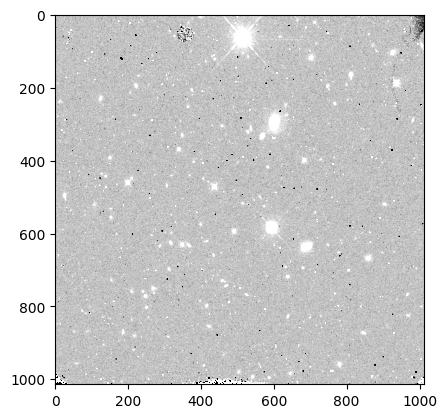

In [63]:
plt.imshow(hst_image['SCI'].data, vmin=0, vmax=1, cmap='Greys_r')

In [64]:
hst_image.close()

JWST

In [65]:
obs_table = Observations.query_criteria(proposal_id="1571",
                                        instrument_name = "NIRISS*")

In [66]:
obs_table

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
str7,str4,str7,str12,str4,str12,str8,str7,str1,str29,float64,float64,str5,str18,int64,float64,float64,float64,float64,float64,str82,float64,str4,str2,int64,str119,str63,str61,str6,bool,float64,str9,str9
science,JWST,CALJWST,NIRISS/WFSS,JWST,GR150R;F150W,Infrared,UNKNOWN,--,jw01571157001_04201_00002_nis,130.52908988170867,1.6992370927956604,image,"Malkan, Matthew A.",2,60022.325154761,60022.3307468287,472.418,800.0,2200.0,PASSAGE--Parallel Application of Slitless Spectroscopy to Analyze Galaxy Evolution,60024.75002314,1571,GO,--,POLYGON 130.510226155 1.680912343 130.510574792 1.718059211 130.547972012 1.717543422 130.547649042 1.680405453,mast:JWST/product/jw01571157001_04201_00002_nis_trapsfilled.jpg,mast:JWST/product/jw01571157001_04201_00002_nis_rateints.fits,PUBLIC,False,nan,119375474,326057584
science,JWST,CALJWST,NIRISS/WFSS,JWST,GR150R;F150W,Infrared,UNKNOWN,--,jw01571157001_04201_00003_nis,130.52901808547026,1.697614360541916,image,"Malkan, Matthew A.",2,60022.33176067535,60022.33735274305,472.418,800.0,2200.0,PASSAGE--Parallel Application of Slitless Spectroscopy to Analyze Galaxy Evolution,60024.75221061,1571,GO,--,POLYGON 130.510154414 1.67928957 130.51050297 1.716436438 130.54790016 1.715920731 130.547577271 1.678782761,mast:JWST/product/jw01571157001_04201_00003_nis_trapsfilled.jpg,mast:JWST/product/jw01571157001_04201_00003_nis_rateints.fits,PUBLIC,False,nan,119375469,326057625
science,JWST,CALJWST,NIRISS/WFSS,JWST,GR150R;F150W,Infrared,UNKNOWN,--,jw01571157001_04201_00001_nis,130.53073974547658,1.6992024697939565,image,"Malkan, Matthew A.",2,60022.31847327951,60022.32406534722,472.418,800.0,2200.0,PASSAGE--Parallel Application of Slitless Spectroscopy to Analyze Galaxy Evolution,60024.75638888,1571,GO,--,POLYGON 130.511875995 1.680877745 130.51222468 1.718024612 130.5496219 1.717508775 130.54929888 1.680370806,mast:JWST/product/jw01571157001_04201_00001_nis_trapsfilled.jpg,mast:JWST/product/jw01571157001_04201_00001_nis_rateints.fits,PUBLIC,False,nan,119375481,326057677
science,JWST,CALJWST,NIRISS/WFSS,JWST,GR150R;F115W,Infrared,UNKNOWN,--,jw01571193001_05201_00004_nis,159.21010960950892,1.7163142597551688,image,"Malkan, Matthew A.",2,60054.30266383553,60054.31422077546,987.783,800.0,2200.0,PASSAGE--Parallel Application of Slitless Spectroscopy to Analyze Galaxy Evolution,60056.10861117,1571,GO,--,POLYGON 159.186757606 1.704210675 159.1978165 1.739676468 159.233473922 1.728394894 159.222442261 1.692930209,mast:JWST/product/jw01571193001_05201_00004_nis_trapsfilled.jpg,mast:JWST/product/jw01571193001_05201_00004_nis_rateints.fits,PUBLIC,False,nan,128703590,326057719
science,JWST,CALJWST,NIRISS/WFSS,JWST,GR150R;F150W,Infrared,UNKNOWN,--,jw01571177001_08201_00001_nis,152.6602242005658,-4.754062209421152,image,"Malkan, Matthew A.",2,60048.91970197627,60048.92280868055,257.682,800.0,2200.0,PASSAGE--Parallel Application of Slitless Spectroscopy to Analyze Galaxy Evolution,60049.50916658,1571,GO,--,POLYGON 152.638558043 -4.769066852 152.644982137 -4.732474158 152.681904289 -4.739077822 152.675509661 -4.775666385,mast:JWST/product/jw01571177001_08201_00001_nis_trapsfilled.jpg,mast:JWST/product/jw01571177001_08201_00001_nis_rateints.fits,PUBLIC,False,nan,127148520,326057727
science,JWST,CALJWST,NIRISS/WFSS,JWST,GR150R;F150W,Infrared,UNKNOWN,--,jw01571157001_04201_00004_nis,130.53069705489688,1.6975302951682096,image,"Malkan, Matthew A.",2,60022.338342886,60022.3439349537,472.418,800.0,2200.0,PASSAGE--Parallel Application of Slitless Spectroscopy to Analyze Galaxy Evolution,60024.75195592,1571,GO,--,POLYGON 130.511833323 1.679205568 130.512182003 1.716352435 130.54957919 1.7158366

In [67]:
id = []
filters = [obs.split(';')[:] for obs in obs_table['filters']]
np.unique(filters)

array(['CLEAR', 'F115W', 'F150W', 'F200W', 'GR150C', 'GR150R'],
      dtype='<U6')

In [68]:
clear = ['CLEAR' in f for f in filters]
blue = [(f == 'GR150R;F115W' or f == 'GR150C;F115W') for f in obs_table['filters']]
green = [(f == 'GR150R;F150W' or f == 'GR150C;F150W') for f in obs_table['filters']]
red = [(f == 'GR150R;F200W' or f == 'GR150C;F200W') for f in obs_table['filters']]

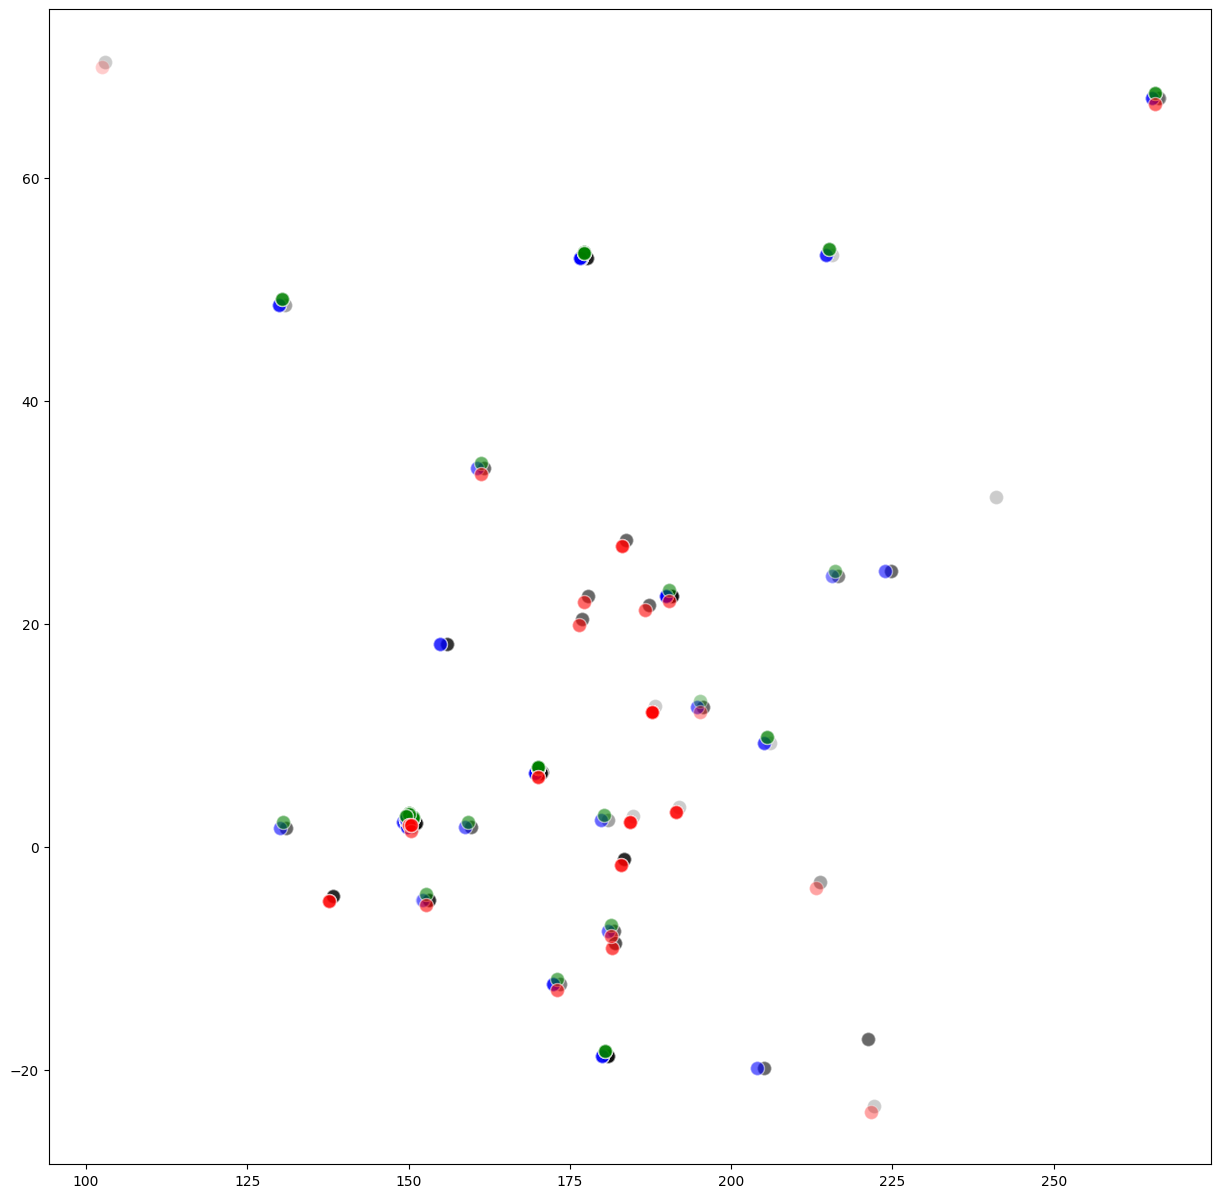

In [70]:
plt.figure(figsize=[15,15])
plt.plot(obs_table['s_ra'][clear]+0.5, obs_table['s_dec'][clear], 'o', markersize=10, mfc='black', mec='white', alpha=0.2)
plt.plot(obs_table['s_ra'][blue]-0.5, obs_table['s_dec'][blue], 'o', markersize=10, mfc='blue', mec='white',alpha=0.2)
plt.plot(obs_table['s_ra'][green], obs_table['s_dec'][green]+0.5, 'o', markersize=10, mfc='green', mec='white',alpha=0.2)
plt.plot(obs_table['s_ra'][red], obs_table['s_dec'][red]-0.5, 'o', markersize=10, mfc='red', mec='white',alpha=0.2)

In [71]:
mask = [(ra > 155) and (ra < 165) and (dec > 30) and (dec < 40) for ra, dec in zip(obs_table['s_ra'], obs_table['s_dec'])]
new_obs_table = obs_table[mask]

In [72]:
new_obs_table

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
str7,str4,str7,str12,str4,str12,str8,str7,str1,str29,float64,float64,str5,str18,int64,float64,float64,float64,float64,float64,str82,float64,str4,str2,int64,str119,str63,str61,str6,bool,float64,str9,str9
science,JWST,CALJWST,NIRISS/WFSS,JWST,GR150R;F115W,Infrared,UNKNOWN,--,jw01571161001_02201_00004_nis,161.16368490702402,33.92828659994156,image,"Malkan, Matthew A.",2,60058.73836343877,60058.74544672454,601.259,800.0,2200.0,PASSAGE--Parallel Application of Slitless Spectroscopy to Analyze Galaxy Evolution,60059.3134143,1571,GO,--,POLYGON 161.132333006 33.924468538 161.158885199 33.954381053 161.195044361 33.932071371 161.168518458 33.90215838,mast:JWST/product/jw01571161001_02201_00004_nis_trapsfilled.jpg,mast:JWST/product/jw01571161001_02201_00004_nis_rateints.fits,PUBLIC,False,nan,129251050,326058543
science,JWST,CALJWST,NIRISS/WFSS,JWST,GR150R;F115W,Infrared,UNKNOWN,--,jw01571161001_02201_00002_nis,161.16335103752647,33.93063769237125,image,"Malkan, Matthew A.",2,60058.72195011701,60058.72903340278,601.259,800.0,2200.0,PASSAGE--Parallel Application of Slitless Spectroscopy to Analyze Galaxy Evolution,60059.10498841,1571,GO,--,POLYGON 161.131998277 33.9268196 161.158551161 33.956732141 161.194711352 33.934422492 161.168184757 33.904509476,mast:JWST/product/jw01571161001_02201_00002_nis_trapsfilled.jpg,mast:JWST/product/jw01571161001_02201_00002_nis_rateints.fits,PUBLIC,False,nan,129203459,326058589
science,JWST,CALJWST,NIRISS/WFSS,JWST,GR150R;F115W,Infrared,UNKNOWN,--,jw01571161001_02201_00001_nis,161.16492188396788,33.929601364069896,image,"Malkan, Matthew A.",2,60058.71357679526,60058.72066008102,601.259,800.0,2200.0,PASSAGE--Parallel Application of Slitless Spectroscopy to Analyze Galaxy Evolution,60059.08645832,1571,GO,--,POLYGON 161.133569456 33.925783546 161.160122397 33.955695855 161.196281864 33.933385891 161.169755214 33.903473106,mast:JWST/product/jw01571161001_02201_00001_nis_trapsfilled.jpg,mast:JWST/product/jw01571161001_02201_00001_nis_rateints.fits,PUBLIC,False,nan,129199451,326058659
science,JWST,CALJWST,NIRISS/WFSS,JWST,GR150R;F115W,Infrared,UNKNOWN,--,jw01571161001_02201_00003_nis,161.162094989134,33.92931394610667,image,"Malkan, Matthew A.",2,60058.73017233924,60058.737255625,601.259,800.0,2200.0,PASSAGE--Parallel Application of Slitless Spectroscopy to Analyze Galaxy Evolution,60059.08645832,1571,GO,--,POLYGON 161.130742775 33.925495517 161.157294779 33.955408343 161.193454757 33.933099084 161.166929042 33.903185782,mast:JWST/product/jw01571161001_02201_00003_nis_trapsfilled.jpg,mast:JWST/product/jw01571161001_02201_00003_nis_rateints.fits,PUBLIC,False,nan,129199454,326058739
science,JWST,CALJWST,NIRISS/WFSS,JWST,GR150R;F150W,Infrared,UNKNOWN,--,jw01571162001_04201_00002_nis,161.16335897958209,33.93064440427011,image,"Malkan, Matthew A.",2,60058.75786860081,60058.76495188657,601.259,800.0,2200.0,PASSAGE--Parallel Application of Slitless Spectroscopy to Analyze Galaxy Evolution,60059.09730321,1571,GO,--,POLYGON 161.132006216 33.926826311 161.158559101 33.956738853 161.194719296 33.934429205 161.168192701 33.904516189,mast:JWST/product/jw01571162001_04201_00002_nis_trapsfilled.jpg,mast:JWST/product/jw01571162001_04201_00002_nis_rateints.fits,PUBLIC,False,nan,129202677,326091790
science,JWST,CALJWST,NIRISS/WFSS,JWST,GR150R;F150W,Infrared,UNKNOWN,--,jw01571162001_04201_00004_nis,161.16370269239405,33.92829324529002,image,"Malkan, Matthew A.",2,60058.77429747813,60058.78138076389,601.259,800.0,2200.0,PASSAGE--Parallel Application of Slitless Spectroscopy to Analyze Galaxy Evolution,60059.28378468,1571,GO,--,POLYGON 161.132350785 33.924475207 161.158903012 33.954387702 

In [76]:
from astropy.table import vstack
product_list = [Observations.get_product_list(obs) for obs in obs_table[mask]]
products = vstack(product_list)
len(products)

144

In [78]:
products

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str9,str4,str5,str29,str64,str1,str68,str9,str28,str11,str1,str7,str6,str4,str50,int64,str9,str6,int64
129251050,JWST,image,jw01571161001_02201_00004_nis,exposure (L2a): charge trap product for persistence,S,mast:JWST/product/jw01571161001_02201_00004_nis_trapsfilled.fits,AUXILIARY,--,TRAPSFILLED,--,CALJWST,1.11.4,1571,jw01571161001_02201_00004_nis_trapsfilled.fits,50362560,129251050,PUBLIC,2
129251050,JWST,image,jw01571161001_02201_00004_nis,Preview-Full,S,mast:JWST/product/jw01571161001_02201_00004_nis_uncal.jpg,PREVIEW,--,--,--,CALJWST,--,1571,jw01571161001_02201_00004_nis_uncal.jpg,858607,129251050,PUBLIC,1
129251050,JWST,image,jw01571161001_02201_00004_nis,Preview-Full,S,mast:JWST/product/jw01571161001_02201_00004_nis_rate.jpg,PREVIEW,--,--,--,CALJWST,1.11.4,1571,jw01571161001_02201_00004_nis_rate.jpg,1020619,129251050,PUBLIC,2
129251050,JWST,image,jw01571161001_02201_00004_nis,Preview-Full,S,mast:JWST/product/jw01571161001_02201_00004_nis_rateints.jpg,PREVIEW,--,--,--,CALJWST,1.11.4,1571,jw01571161001_02201_00004_nis_rateints.jpg,1020652,129251050,PUBLIC,2
129251050,JWST,image,jw01571161001_02201_00004_nis,Preview-Full,S,mast:JWST/product/jw01571161001_02201_00004_nis_trapsfilled.jpg,PREVIEW,--,--,--,CALJWST,1.11.4,1571,jw01571161001_02201_00004_nis_trapsfilled.jpg,759499,129251050,PUBLIC,2
129251050,JWST,image,jw01571161001_02201_00004_nis,exposure (L2a): 2D count rate averaged over integrations,S,mast:JWST/product/jw01571161001_02201_00004_nis_rate.fits,SCIENCE,Minimum Recommended Products,RATE,--,CALJWST,1.11.4,1571,jw01571161001_02201_00004_nis_rate.fits,83943360,129251050,PUBLIC,2
129251050,JWST,image,jw01571161001_02201_00004_nis,exposure (L2a): 3D countrate per integration,S,mast:JWST/product/jw01571161001_02201_00004_nis_rateints.fits,SCIENCE,Minimum Recommended Products,RATEINTS,--,CALJWST,1.11.4,1571,jw01571161001_02201_00004_nis_rateints.fits,83949120,129251050,PUBLIC,2
129251050,JWST,image,jw01571161001_02201_00004_nis,exposure (L1b): Uncalibrated 4D exposure data,S,mast:JWST/product/jw01571161001_02201_00004_nis_uncal.fits,SCIENCE,Minimum Recommended Products,UNCAL,--,CALJWST,--,1571,jw01571161001_02201_00004_nis_uncal.fits,117486720,129251050,PUBLIC,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [79]:
filtered = Observations.filter_products(products,productType=['SCIENCE','PREVIEW'],
                                            extension=['_rate.fits','_rate.jpg'])
print(len(filtered))
filtered

32


obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str9,str4,str5,str29,str64,str1,str68,str9,str28,str11,str1,str7,str6,str4,str50,int64,str9,str6,int64
129251050,JWST,image,jw01571161001_02201_00004_nis,Preview-Full,S,mast:JWST/product/jw01571161001_02201_00004_nis_rate.jpg,PREVIEW,--,--,--,CALJWST,1.11.4,1571,jw01571161001_02201_00004_nis_rate.jpg,1020619,129251050,PUBLIC,2
129251050,JWST,image,jw01571161001_02201_00004_nis,exposure (L2a): 2D count rate averaged over integrations,S,mast:JWST/product/jw01571161001_02201_00004_nis_rate.fits,SCIENCE,Minimum Recommended Products,RATE,--,CALJWST,1.11.4,1571,jw01571161001_02201_00004_nis_rate.fits,83943360,129251050,PUBLIC,2
129203459,JWST,image,jw01571161001_02201_00002_nis,Preview-Full,S,mast:JWST/product/jw01571161001_02201_00002_nis_rate.jpg,PREVIEW,--,--,--,CALJWST,1.11.4,1571,jw01571161001_02201_00002_nis_rate.jpg,1023247,129203459,PUBLIC,2
129203459,JWST,image,jw01571161001_02201_00002_nis,exposure (L2a): 2D count rate averaged over integrations,S,mast:JWST/product/jw01571161001_02201_00002_nis_rate.fits,SCIENCE,Minimum Recommended Products,RATE,--,CALJWST,1.11.4,1571,jw01571161001_02201_00002_nis_rate.fits,83943360,129203459,PUBLIC,2
129199451,JWST,image,jw01571161001_02201_00001_nis,Preview-Full,S,mast:JWST/product/jw01571161001_02201_00001_nis_rate.jpg,PREVIEW,--,--,--,CALJWST,1.11.4,1571,jw01571161001_02201_00001_nis_rate.jpg,1022042,129199451,PUBLIC,2
129199451,JWST,image,jw01571161001_02201_00001_nis,exposure (L2a): 2D count rate averaged over integrations,S,mast:JWST/product/jw01571161001_02201_00001_nis_rate.fits,SCIENCE,Minimum Recommended Products,RATE,--,CALJWST,1.11.4,1571,jw01571161001_02201_00001_nis_rate.fits,83943360,129199451,PUBLIC,2
129199454,JWST,image,jw01571161001_02201_00003_nis,Preview-Full,S,mast:JWST/product/jw01571161001_02201_00003_nis_rate.jpg,PREVIEW,--,--,--,CALJWST,1.11.4,1571,jw01571161001_02201_00003_nis_rate.jpg,1022792,129199454,PUBLIC,2
129199454,JWST,image,jw01571161001_02201_00003_nis,exposure (L2a): 2D count rate averaged over integrations,S,mast:JWST/product/jw01571161001_02201_00003_nis_rate.fits,SCIENCE,Minimum Recommended Products,RATE,--,CALJWST,1.11.4,1571,jw01571161001_02201_00003_nis_rate.fits,83943360,129199454,PUBLIC,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
#Observations.download_products(filtered, download_dir='RAW/')

## Archives with TAP Services

TAP stands for Table Access Protocol which is a standard way that many archives provide access to data. This is a Virtual Observatory (VO) standard and you can find much more about searching and accessing TAP tables in the extensive [NAVO Notebooks](https://nasa-navo.github.io/navo-workshop/index.html). Here I will show a couple of simple examples.

Some astroquery modules are simply wrappers around TAP services, for example GAIA. 

The examples below is taken from the [Astronomical Data Carpentries lesson](https://datacarpentry.org/astronomy-python/).

In [80]:
from astroquery.gaia import Gaia

In [81]:
tables = Gaia.load_tables(only_names=True)
tables

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [82]:
for table in tables:
    print(table.name)

external.apassdr9
external.catwise2020
external.gaiadr2_astrophysical_parameters
external.gaiadr2_geometric_distance
external.gaiaedr3_distance
external.gaiaedr3_gcns_main_1
external.gaiaedr3_gcns_rejected_1
external.gaiaedr3_spurious
external.galex_ais
external.ravedr5_com
external.ravedr5_dr5
external.ravedr5_gra
external.ravedr5_on
external.ravedr6
external.sdssdr13_photoprimary
external.skymapperdr1_master
external.skymapperdr2_master
external.tmass_xsc
gaiadr1.aux_qso_icrf2_match
gaiadr1.ext_phot_zero_point
gaiadr1.allwise_best_neighbour
gaiadr1.allwise_neighbourhood
gaiadr1.gsc23_best_neighbour
gaiadr1.gsc23_neighbourhood
gaiadr1.ppmxl_best_neighbour
gaiadr1.ppmxl_neighbourhood
gaiadr1.sdss_dr9_best_neighbour
gaiadr1.sdss_dr9_neighbourhood
gaiadr1.tmass_best_neighbour
gaiadr1.tmass_neighbourhood
gaiadr1.ucac4_best_neighbour
gaiadr1.ucac4_neighbourhood
gaiadr1.urat1_best_neighbour
gaiadr1.urat1_neighbourhood
gaiadr1.cepheid
gaiadr1.phot_variable_time_series_gfov
gaiadr1.phot_varia

There are lots of table, here are some examples:

- gaiadr2.gaia_source, which contains Gaia data from data release 2,

- gaiadr2.panstarrs1_original_valid, which contains the photometry data we’ll use from PanSTARRS, and

- gaiadr2.panstarrs1_best_neighbour, which we’ll use to cross-match each star observed by Gaia with the same star observed by PanSTARRS.

You can probably infer what many of these tables and columns are by looking at the names, but you should resist the temptation to guess. To find out what the columns mean, [read the documentation](https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/).

In [83]:
meta = Gaia.load_table('gaiadr2.gaia_source')
meta

In [84]:
print(meta)

TAP Table name: gaiadr2.gaiadr2.gaia_source
Description: This table has an entry for every Gaia observed source as listed in the
Main Database accumulating catalogue version from which the catalogue
release has been generated. It contains the basic source parameters,
that is only final data (no epoch data) and no spectra (neither final
nor epoch).
Num. columns: 96


In [85]:
# Print the columns in the table
for column in meta.columns:
    print(column.name)

solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
astrometric_weight_al
astrometric_pseudo_colour
astrometric_pseudo_colour_error
mean_varpi_factor_al
astrometric_matched_observations
visibility_periods_used
astrometric_sigma5d_max
frame_rotator_object_type
matched_observations
duplicated_source
phot_g_n_obs
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_flux_over_error
phot_g_mean_mag
phot_bp_n_obs
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_flux_over_error
phot_bp_mean_ma

This is just the metadata. How do you get the actual data. You don't. The point of archives like this one and other large archives is that you do not need to download the full data but you can filter it on the remote server and only download data that satisfies your search criteria. The query is written in a language similar to SQL (structured query language) which has had some astro functionality added called ADQL (the Astronomical Data Query Language).  

Here is a simple ADQL query:

In [87]:
query1 = """SELECT 
TOP 10
source_id, ra, dec, parallax 
FROM gaiadr2.gaia_source
"""

In [88]:
job = Gaia.launch_job(query1)
job

In [89]:
print(job)

<Table length=10>
   name    dtype  unit                            description                             n_bad
--------- ------- ---- ------------------------------------------------------------------ -----
source_id   int64      Unique source identifier (unique within a particular Data Release)     0
       ra float64  deg                                                    Right ascension     0
      dec float64  deg                                                        Declination     0
 parallax float64  mas                                                           Parallax     4
Jobid: None
Phase: COMPLETED
Owner: None
Output file: 1700815531965O-result.vot.gz
Results: None


In [90]:
results = job.get_results()
type(results)

astropy.table.table.Table

In [91]:
results

source_id,ra,dec,parallax
,deg,deg,mas
int64,float64,float64,float64
6027948533688000512,252.97600276811252,-31.053828128950425,0.4218087495127073
6027927883438290048,253.11870504005344,-31.30974080130608,0.68706724596879
6027914998566064000,252.18171728060673,-31.04877878275985,1.3471734992556512
6027939393957155456,253.4283099367056,-31.013449555748974,--
6027933003083929344,253.01396063071766,-31.22603116343663,1.0051243974688497
6027905446571923840,252.49331114431135,-31.101596133852944,--
6027912387239686016,252.33839046366603,-31.07638381545943,--
6027938565045211776,253.40379227851395,-31.087435131329098,-9.357328875032113


## Astrometry.net in the Notebook Example

In order to use astrometry.net in the notebook, we need to specify a key. Instructions are on the astroquery website:

https://astroquery.readthedocs.io/en/latest/astrometry_net/astrometry_net.html

A short summary:
- Create an account on the astrometry.net website. You can log in with Google, GitHub, etc.
- Go to the My Profile section or [here](https://nova.astrometry.net/api_help) to find your API key
- Create a file for the configuration, it needs to live in a specific location: `touch ~/.astropy/config/astroquery.cfg`
- Open the file with a text editor and add the content below:
```
[astrometry_net]

## The Astrometry.net API key.
api_key = KEY FROM THE WEBSITE

## Name of server
server = http://nova.astrometry.net

## Default timeout for connecting to server
timeout = 120
```

In [ ]:
from astroquery.astrometry_net import AstrometryNet
from astropy.io import fits

fit = False

ast = AstrometryNet()
if fit == True:
    wcs_header = ast.solve_from_image('../WCS/rozhen2m_1.fits', force_image_upload=True)
    day4_header = fits.getheader('../WCS/new_rozhen2m_1.fits')
    diff = fits.diff.HeaderDiff(wcs_header, day4_header)
    print(diff.report())


[Astroquery](https://astroquery.readthedocs.io/en/latest/) is an affiliated package in the Astropy Project. Most of the functionality is developed by the archives themselves. Let's look at the list of archives which are represented.

## Resources

Notebook from Erik and Brigitta:

https://github.com/AstroHackWeek/AstroHackWeek2019/blob/master/day2_software/Querying%20with%20Astroquery.ipynb

MAST notebooks repo:

https://spacetelescope.github.io/mast_notebooks/intro.html

CDS:

https://github.com/cds-astro/tutorials

GAIA:

https://allendowney.github.io/AstronomicalData/01_query.html

ALMA:

https://almascience.eso.org/alma-data/archive/archive-notebooks

ESA:

https://www.cosmos.esa.int/web/hst/astroquery

NAVO workshops:

https://nasa-navo.github.io/navo-workshop/index.html

NOIRLab DataLab

https://datalab.noirlab.edu/

PyESASky: 

https://github.com/esdc-esac-esa-int/pyesasky/tree/master